In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import namedtuple

In [ ]:
Data = namedtuple('Data', ['name', 'all_coverage_filepath', 'browser_coverage_filepath', 'exectime', 'color', 'label'])

def map_data(data: Data):
    seconds_per_hour = 3600
    cov = None
    with open(data.browser_coverage_filepath, 'r') as f:
        cov = pd.read_csv(f, header=None)

    num_edges = cov.iloc[0,1]
    cov.columns = ['input', 'browser_coverage']
    cov.drop(cov.index[0], inplace=True)

    with open(data.all_coverage_filepath, 'r') as f:
        all_cov = pd.read_csv(f, header=None)
        all_cov.columns = ['input', 'all_coverage']
        all_cov.drop(all_cov.index[0], inplace=True)
        cov = pd.concat([cov, all_cov['all_coverage']], axis=1)

    cov['input'] = cov['input'].astype(float).apply(lambda x: x*data.exectime / seconds_per_hour)
    cov.rename(columns={'input': 'time'}, inplace=True)

    cov = cov[cov['time'] <= 24]

    cov['browser_coverage'] = cov['browser_coverage'].astype(float).apply(lambda x: x/num_edges * 100)
    cov['all_coverage'] = cov['all_coverage'].astype(float).apply(lambda x: x/num_edges * 100)
    return cov


def plot_coverage(data: list[Data], title: str, filename: str|None = None):
    # Create a plot
    plt.rcParams.update({'font.size': 22})
    plt.figure(figsize=(12, 9))

    linewidth = 2.5

    total_max = 0

    for d in data:
        cov = map_data(d)
        plt.plot(cov['time'], cov['browser_coverage'], label=f'{d.label}-browser', color=d.color, linestyle='--', linewidth=linewidth)
        plt.plot(cov['time'], cov['all_coverage'], label=f'{d.label}-all', color=d.color, linewidth=linewidth)
        total_max = max(cov['all_coverage'].max(), total_max)

    plt.title(title)
    plt.ylabel('% Edge Coverage')
    plt.xlabel('Time (hours)')
    plt.legend()
    plt.grid()
    plt.xlim(-0.25, 24)  # Limit x-axis to 24 seconds
    plt.ylim(0, total_max + 1)  # Adjust y-axis for visibility
    plt.tight_layout()  # Adjust layout to prevent clipping of titles/labels
    if filename:
        plt.savefig(filename)
    else:
        plt.show()
    plt.close()



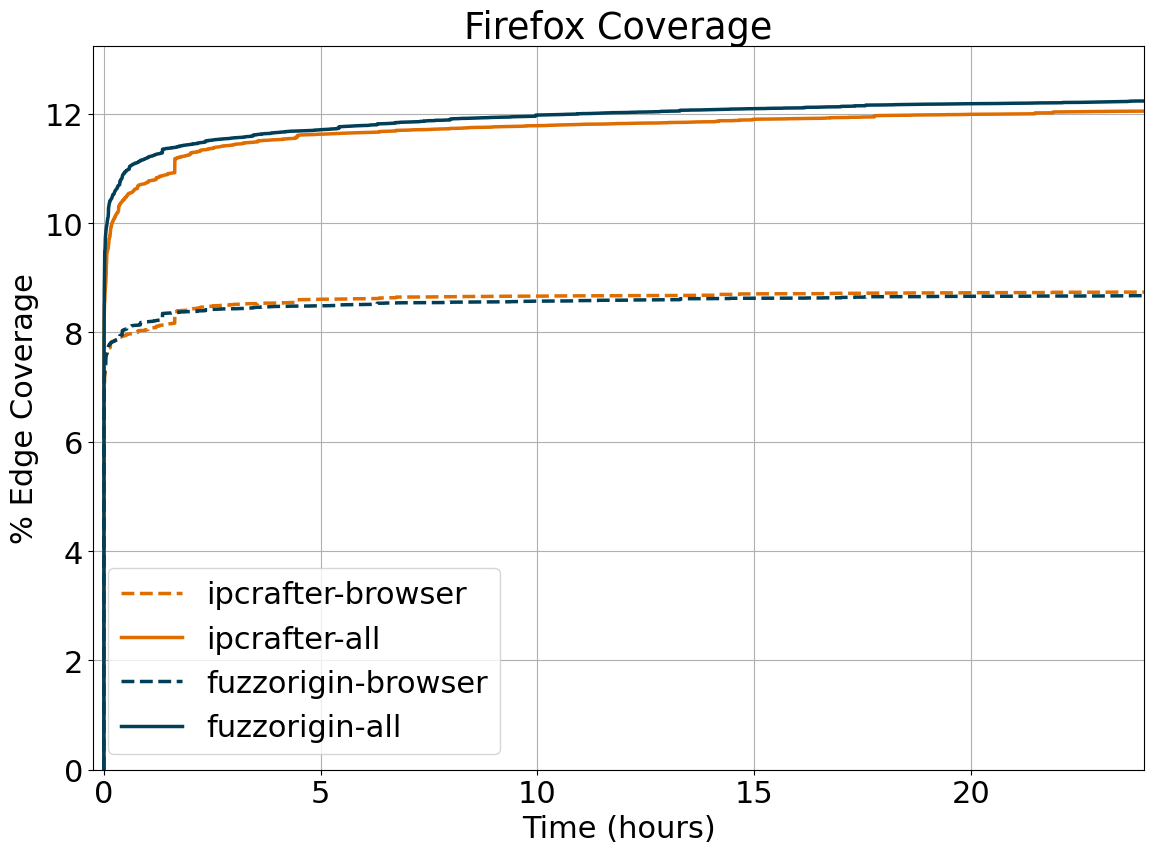

In [ ]:


orange = (225/256, 109/256, 0)
blue = (0, 63/256, 87/256)

chrome_data = [
    Data('IPCrafter Chrome', 'ipcrafter_chrome_all_coverage.csv', 'ipcrafter_chrome_browser_coverage.csv', 4.0, 'black', 'ipcrafter'),
    Data('Fuzzorigin Chrome', 'fuzzorigin_chrome_all_coverage.csv', 'fuzzorigin_chrome_browser_coverage.csv', 7.5, blue, 'fuzzorigin'),
    Data('New IPCrafter Chrome', 'ipcrafter_chrome_all_coverage_new.csv', 'ipcrafter_chrome_browser_coverage_new.csv', 3.02,  orange, 'ipcrafter2'),

]
plot_coverage(chrome_data, 'Chrome Coverage (24 hours)', 'chrome_coverage.png')

firefox_data = [
    Data('IPCrafter Firefox', 'ipcrafter_firefox_all_coverage.csv', 'ipcrafter_firefox_browser_coverage.csv', 7.15, orange, 'ipcrafter'),
    Data('Fuzzorigin Firefox', 'fuzzorigin_firefox_all_coverage.csv', 'fuzzorigin_firefox_browser_coverage.csv', 6.79, blue, 'fuzzorigin'),
    # Data('New IPCrafter Firefox', 'ipcrafter_firefox_all_coverage_new.csv', 'ipcrafter_firefox_browser_coverage_new.csv', 3.02,  orange, 'ipcrafter2'),
]
plot_coverage(firefox_data, 'Firefox Coverage (24 hours)')
